<a href="https://colab.research.google.com/github/simonepirocca/research_project/blob/master/notebooks/model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data_csv_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQnuwM5K4DAJV0LnbCYaZO13HIvEkBdeShHar3Am9Qs2YDPerFObzY5ABFapeJlOl8YNuf5P8_wGIZj/pub?output=csv"

In [ ]:
# Columns/Features
#df.columns

In [ ]:
# Read each csv line
stars_values = []
last_commit_values = []
commit_freq_values = []
release_freq_values = []
open_issues_values = []
closed_issues_values = []
avg_days_to_close_issue_values = []
contributors_values = []

pypi_downloads_values = []
dep_repos_values = []
dep_pkgs_values = []

start = 0
count = 4000
end = start + count
line_count = 0

df = pd.read_csv(data_csv_path, delimiter=';')
for row in df.iterrows():
    if line_count >= start:

        # Define targets (y)
        package_name = row[1]['package_name']
        pypi_downloads = str(row[1]['pypi_downloads'])
        if pypi_downloads != "nan": pypi_downloads_values.append(float(pypi_downloads))
        dep_repos = str(row[1]['dep_repos'])
        if dep_repos != "nan": dep_repos_values.append(float(dep_repos))
        dep_pkgs = str(row[1]['dep_pkgs'])
        if dep_pkgs != "nan": dep_pkgs_values.append(float(dep_pkgs))

        # Definine features (Xs)
        stars = str(row[1]['stars'])
        if stars != "nan": stars_values.append(float(stars))
        last_commit = str(row[1]['last_commit'])
        if last_commit != "nan":
            parts = last_commit.split("/")
            last_commit = parts[2] + parts[1] + parts[0]
            last_commit_values.append(float(last_commit))
        commit_freq = str(row[1]['commit_freq'])
        if commit_freq != "nan": commit_freq_values.append(float(commit_freq))
        release_freq = str(row[1]['release_freq'])
        if release_freq != "nan": release_freq_values.append(float(release_freq))
        open_issues = str(row[1]['open_issues'])
        if open_issues != "nan": open_issues_values.append(float(open_issues))
        closed_issues = str(row[1]['closed_issues'])
        if closed_issues != "nan": closed_issues_values.append(float(closed_issues))
        avg_days_to_close_issue = str(row[1]['avg_days_to_close_issue'])
        if avg_days_to_close_issue != "nan": avg_days_to_close_issue_values.append(float(avg_days_to_close_issue))
        contributors = str(row[1]['contributors'])
        if contributors != "nan": contributors_values.append(float(contributors))

    line_count += 1
    if line_count >= end: break

stars_values = np.array(stars_values)
last_commit_values = np.array(last_commit_values)
commit_freq_values = np.array(commit_freq_values)
release_freq_values = np.array(release_freq_values)
open_issues_values = np.array(open_issues_values)
closed_issues_values = np.array(closed_issues_values)
avg_days_to_close_issue_values = np.array(avg_days_to_close_issue_values)
contributors_values = np.array(contributors_values)

pypi_downloads_values = np.array(pypi_downloads_values)
dep_repos_values = np.array(dep_repos_values)
dep_pkgs_values = np.array(dep_pkgs_values)

metrics = [stars_values, last_commit_values, commit_freq_values, release_freq_values, open_issues_values, closed_issues_values,\
 avg_days_to_close_issue_values, contributors_values, pypi_downloads_values, dep_repos_values, dep_pkgs_values]

#print("Rows count for stars: " + str(len(stars_values)))

#print("Call 'describe' function for the entire set")
#desc = df.describe()
#print(desc)

metrics_names = ["stars", "last_commit", "commit_freq", "release_freq", "open_issues", "closed_issues",\
 "avg_days_to_close_issue", "contributors", "pypi_downloads", "dep_repos", "dep_pkgs"]

for i in range(0, 11):
    print("Call 'describe' function for the single metric '" + metrics_names[i] + "'...")
    metric_describe = pd.DataFrame(metrics[i])
    desc = metric_describe.describe()
    print(desc)


Call 'describe' function for the single metric 'stars'...
                   0
count    3166.000000
mean     1510.120657
std      6225.811547
min         0.000000
25%        48.000000
50%       208.500000
75%       863.000000
max    148250.000000
Call 'describe' function for the single metric 'last_commit'...
                  0
count  3.164000e+03
mean   2.019487e+07
std    1.270070e+04
min    2.009120e+07
25%    2.019121e+07
50%    2.020062e+07
75%    2.020081e+07
max    2.020091e+07
Call 'describe' function for the single metric 'commit_freq'...
                 0
count  3164.000000
mean     19.036030
std      87.233027
min       0.000000
25%       1.000000
50%       4.000000
75%      11.000000
max    2691.000000
Call 'describe' function for the single metric 'release_freq'...
                 0
count  2894.000000
mean    234.025570
std     419.189268
min       0.000000
25%      51.000000
50%     106.000000
75%     225.000000
max    3899.000000
Call 'describe' function for the singl

In [ ]:
# Read each csv line
X1 = []
X2 = []
X3 = []
y1 = []
y2 = []
y3 = []
start = 0
count = 4000
end = start + count
line_count = 0

df = pd.read_csv(data_csv_path, delimiter=';')
for row in df.iterrows():
    if line_count >= start:
        complete_row = True
        complete_y1 = True
        complete_y2 = True
        complete_y3 = True

        # Define targets (y)
        package_name = row[1]['package_name']
        y1_var = str(row[1]['pypi_downloads'])
        y2_var = str(row[1]['dep_repos'])
        y3_var = str(row[1]['dep_pkgs'])

        # Definine features (Xs)
        stars = str(row[1]['stars'])
        if stars == "nan": complete_row = False
        last_commit = str(row[1]['last_commit'])
        if last_commit != "nan":
            parts = last_commit.split("/")
            last_commit = parts[2] + parts[1] + parts[0]
        else: complete_row = False
        commit_freq = str(row[1]['commit_freq'])
        if commit_freq == "nan": complete_row = False
        release_freq = str(row[1]['release_freq'])
        if release_freq == "nan": complete_row = False
        open_issues = str(row[1]['open_issues'])
        if open_issues == "nan": complete_row = False
        closed_issues = str(row[1]['closed_issues'])
        if closed_issues == "nan": complete_row = False
        avg_days_to_close_issue = str(row[1]['avg_days_to_close_issue'])
        if avg_days_to_close_issue == "nan": complete_row = False
        contributors = str(row[1]['contributors'])
        if contributors == "nan": complete_row = False

        # Append to arrays if all metrics are not null
        tmp = [float(stars), float(last_commit), float(commit_freq), float(release_freq), float(open_issues), float(closed_issues), float(avg_days_to_close_issue), float(contributors)]
        if complete_row and y1_var != "nan":
            X1.append(tmp)
            y1.append(float(y1_var))

        if complete_row and y2_var != "nan":
            X2.append(tmp)
            y2.append(float(y2_var))

        if complete_row and y3_var != "nan":
            X3.append(tmp)
            y3.append(float(y3_var))

    line_count += 1
    if line_count >= end: break


X1 = np.array(X1)
X2 = np.array(X2)
X3 = np.array(X3)
X = np.array([X1, X2, X3])
Y = np.array([y1, y2, y3])
print("Rows count for Y1: " + str(len(y1)))
print("Rows count for Y2: " + str(len(y2)))
print("Rows count for Y3: " + str(len(y3)))

Rows count for Y1: 2221
Rows count for Y2: 1496
Rows count for Y3: 1408


In [ ]:
# Find relation between metrics
threshold_r = 0.7
threshold_pvalue = 0.05
decimals = 4
for chosen_y in range(0, 3):
    if chosen_y == 0: y_column = "PyPi downloads"
    elif chosen_y == 1: y_column = "Dependent repositories"
    else: y_column = "Dependent packages"
    print("Pearson correlation matrix for Y = " + y_column)
    print("")
    print("|---------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|")
    print("|\033[1m       METRIC        \033[0m|\033[1m     Stars            Last Commit     Commit frequency   Release frequency    Open issues       Closed issues    Time to close issue   Contributors   \033[0m|")
    print("|---------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|")

    for i in range(0, 8):
        for j in range(0, 8):
            if j == 0:
                if i == 0:   print("| \033[1mStars               \033[0m|", end =" ")
                elif i == 1: print("| \033[1mLast Commit         \033[0m|", end =" ")
                elif i == 2: print("| \033[1mCommit frequency    \033[0m|", end =" ")
                elif i == 3: print("| \033[1mRelease frequency   \033[0m|", end =" ")
                elif i == 4: print("| \033[1mOpen issues         \033[0m|", end =" ")
                elif i == 5: print("| \033[1mClosed issues       \033[0m|", end =" ")
                elif i == 6: print("| \033[1mTime to close issue \033[0m|", end =" ")
                else:        print("| \033[1mContributors        \033[0m|", end =" ")

            info = stats.pearsonr(X[chosen_y][:,i], X[chosen_y][:,j])
            r = info[0]
            pvalue = info[1]

            str_r = str(round(r, decimals))
            if str_r[0] != "-": str_r = "+" + str_r
            if len(str_r) < (3+decimals):
                for k in range(0, (3+decimals)-len(str_r)): str_r += "0"

            str_pvalue = str(round(pvalue, decimals))
            if str_pvalue[0] != "-": str_pvalue = "+" + str_pvalue
            if len(str_pvalue) < (3+decimals): 
                for k in range(0, (3+decimals)-len(str_pvalue)): str_pvalue += "0"

            if i == j:
                str_r = "\033[1m" + str_r
                str_pvalue += "\033[0m"
            else:
                if abs(r) > threshold_r:
                    str_r = "\033[91m" + str_r + "\033[0m"
           #     if abs(pvalue) < threshold_pvalue:
           #         str_pvalue = "\033[94m" + str_pvalue + "\033[0m"

            if j != 7: print(str_r + "|" + str_pvalue + "   ", end =" ")
            else: print(str_r + "|" + str_pvalue + " |", end =" ")
        print("")
    print("|---------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|")
    
    print("")
    print("")
    print("==============================================================================================================================================================================")
    print("")

Pearson correlation matrix for Y = PyPi downloads

|---------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|
|       METRIC        |     Stars            Last Commit     Commit frequency   Release frequency    Open issues       Closed issues    Time to close issue   Contributors   |
|---------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|
| Stars               | +1.0000|+0.0000    +0.0874|+0.0000    +0.5945|+0.0000    -0.0841|+0.0001    +0.6642|+0.0000    +0.7765|+0.0000    -0.1305|+0.0000    +0.7676|+0.0000 | 
| Last Commit         | +0.0874|+0.0000    +1.0000|+0.0000    +0.1062|+0.0000    -0.3427|+0.0000    +0.0772|+0.0003    +0.0959|+0.0000    -0.0664|+0.0017    +0.1222|+0.0000 | 
| Commit frequency    | +0.5945|+0.0000    +0.1062|+0.0000    +1.0000|+0

In [ ]:
#30/09/2020
#print(str(datetime.now())[10])
from dateutil import parser
last_commit_example = parser.parse("30/10/2020")  # datetime.datetime(1999, 8, 28, 0, 0)
last_commit_test = last_commit_example - datetime.now()
print(last_commit_test.days)

27


In [ ]:
# Recreate matrix eliminating dependent metrics (Stars, Commit frequency, Open issues and Contributors depend on Closed issues)
X1 = []
X2 = []
X3 = []
y1 = []
y2 = []
y3 = []
start = 0
count = 4000
end = start + count
line_count = 0

df1 = pd.read_csv(data_csv_path, delimiter=';')
for row in df1.iterrows():
    if line_count >= start:
        complete_row = True
        complete_y1 = True
        complete_y2 = True
        complete_y3 = True

        # Define targets (y)
        package_name = row[1]['package_name']
        y1_var = str(row[1]['pypi_downloads'])
        y2_var = str(row[1]['dep_repos'])
        y3_var = str(row[1]['dep_pkgs'])

        # Definine features (Xs)
        #stars = str(row[1]['stars'])
        #if stars == "nan": complete_row = False
        last_commit = str(row[1]['last_commit'])
        if last_commit != "nan":
            last_commit = (datetime.now() - parser.parse(last_commit)).days
            #parts = last_commit.split("/")
            #last_commit = parts[2] + parts[1] + parts[0]
        else: complete_row = False
        commit_freq = str(row[1]['commit_freq'])
        if commit_freq == "nan": complete_row = False
        release_freq = str(row[1]['release_freq'])
        if release_freq == "nan": complete_row = False
        #open_issues = str(row[1]['open_issues']) DEPENDS ON Closed issues
        #if open_issues == "nan": complete_row = False
        closed_issues = str(row[1]['closed_issues'])
        if closed_issues == "nan": complete_row = False
        avg_days_to_close_issue = str(row[1]['avg_days_to_close_issue'])
        if avg_days_to_close_issue == "nan": complete_row = False
        #contributors = str(row[1]['contributors']) DEPENDS ON Closed issues
        #if contributors == "nan": complete_row = False

        # Append to arrays if all metrics are not null
        #tmp = [float(last_commit), float(release_freq), float(closed_issues), float(avg_days_to_close_issue)]
        tmp = [float(release_freq), float(closed_issues), float(avg_days_to_close_issue)]
        if complete_row and y1_var != "nan":
            X1.append(tmp)
            y1.append(float(y1_var))

        if complete_row and y2_var != "nan":
            if float(y2_var) < 1000000 and float(closed_issues) < 10000 and float(avg_days_to_close_issue) < 900:
                X2.append(tmp)
                y2.append(float(y2_var))

        if complete_row and y3_var != "nan":
            if float(y3_var) < 10000 and float(closed_issues) < 10000:
                X3.append(tmp)
                y3.append(float(y3_var))

    line_count += 1
    if line_count >= end: break


X1 = np.array(X1)
X2 = np.array(X2)
X3 = np.array(X3)
X = np.array([X1, X2, X3])
Y = np.array([y1, y2, y3])
print("Rows count for Y1: " + str(len(y1)))
print("Rows count for Y2: " + str(len(y2)))
print("Rows count for Y3: " + str(len(y3)))

Rows count for Y1: 2322
Rows count for Y2: 1511
Rows count for Y3: 1412


In [ ]:
# Modify cells
for i in range(0, len(Y[0])):
    pypi_downloads_an = Y[0][i]
    if pypi_downloads_an <= 0: pypi_downloads_an = 1
    Y[0][i] = math.log(pypi_downloads_an, 10)

for i in range(0, len(Y[1])):
    dep_repos_an = Y[1][i]
    if dep_repos_an <= 0: dep_repos_an = 1
    Y[1][i] = math.log(dep_repos_an, 10)    

for i in range(0, len(Y[2])):
    dep_pkgs_an = Y[2][i]
    if dep_pkgs_an <= 0: dep_pkgs_an = 1
    Y[2][i] = math.log(dep_pkgs_an, 10)
    
for i in range(0, len(X[0])):
    #last_commit_an = X[0][i][0]
    #if last_commit_an <= 0: last_commit_an = 1
    release_freq_an = X[0][i][0]
    if release_freq_an <= 0: release_freq_an = 1
    closed_issues_an = X[0][i][1]
    if closed_issues_an <= 0: closed_issues_an = 1
    time_close_an = X[0][i][2]
    if time_close_an <= 0: time_close_an = 1
    #X[0][i][0] = math.log(last_commit_an, 10)
    X[0][i][0] = math.log(release_freq_an, 10)
    X[0][i][1] = math.log(closed_issues_an, 10)
    #X[0][i][2] = math.log(time_close_an, 10)

for i in range(0, len(X[1])):
    #last_commit_an = X[1][i][0]
    #if last_commit_an <= 0: last_commit_an = 1
    release_freq_an = X[1][i][0]
    if release_freq_an <= 0: release_freq_an = 1
    closed_issues_an = X[1][i][1]
    if closed_issues_an <= 0: closed_issues_an = 1
    time_close_an = X[1][i][2]
    if time_close_an <= 0: time_close_an = 1
    #X[1][i][0] = math.log(last_commit_an, 10)
    X[1][i][0] = math.log(release_freq_an, 10)
    X[1][i][1] = math.log(closed_issues_an, 10)
    #X[1][i][2] = math.log(time_close_an, 10)

for i in range(0, len(X[2])):
    #last_commit_an = X[2][i][0]
    #if last_commit_an <= 0: last_commit_an = 1
    release_freq_an = X[2][i][0]
    if release_freq_an <= 0: release_freq_an = 1
    closed_issues_an = X[2][i][1]
    if closed_issues_an <= 0: closed_issues_an = 1
    time_close_an = X[2][i][2]
    if time_close_an <= 0: time_close_an = 1
    #X[2][i][0] = math.log(last_commit_an, 10)
    X[2][i][0] = math.log(release_freq_an, 10)
    X[2][i][1] = math.log(closed_issues_an, 10)
    #X[2][i][2] = math.log(time_close_an, 10)

In [ ]:
# Fit models
targets_count = len(Y)
for chosen_y in range(0, targets_count):
    tmp_X = sm.add_constant(X[chosen_y])
    est = sm.OLS(Y[chosen_y], tmp_X)
    est2 = est.fit()

    if chosen_y == 0: y_column = "PyPi downloads"
    elif chosen_y == 1: y_column = "Dependent repositories"
    else: y_column = "Dependent packages"
    print("Summary for the fit of Y = " + y_column)
    print(est2.summary())


Summary for the fit of Y = PyPi downloads
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     69.62
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           4.18e-43
Time:                        10:18:07   Log-Likelihood:                -2498.4
No. Observations:                2322   AIC:                             5005.
Df Residuals:                    2318   BIC:                             5028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

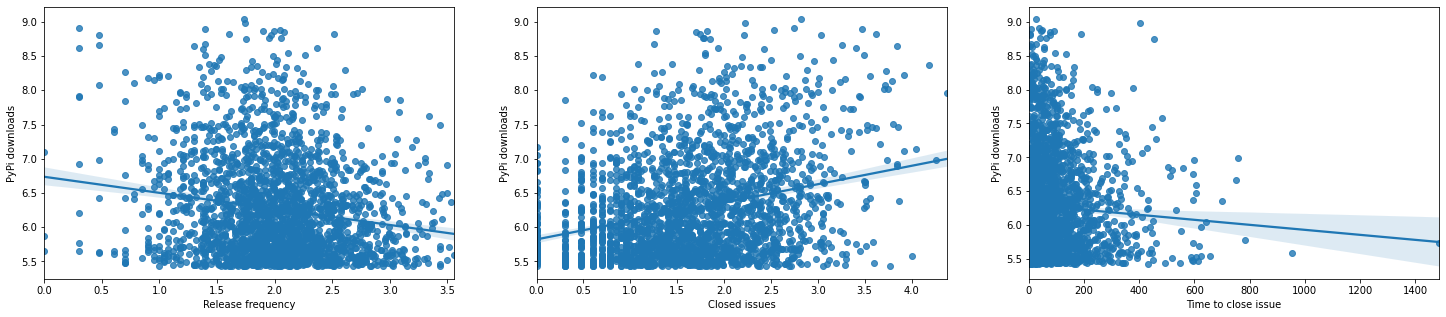

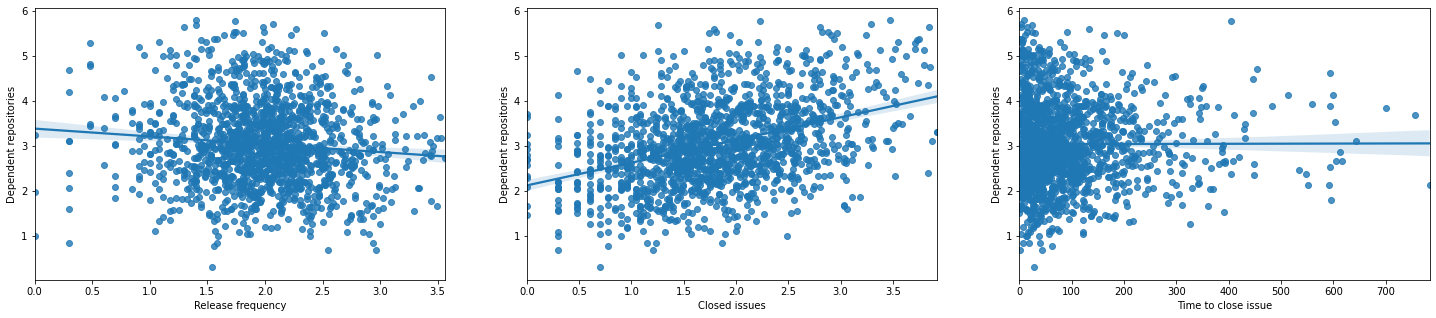

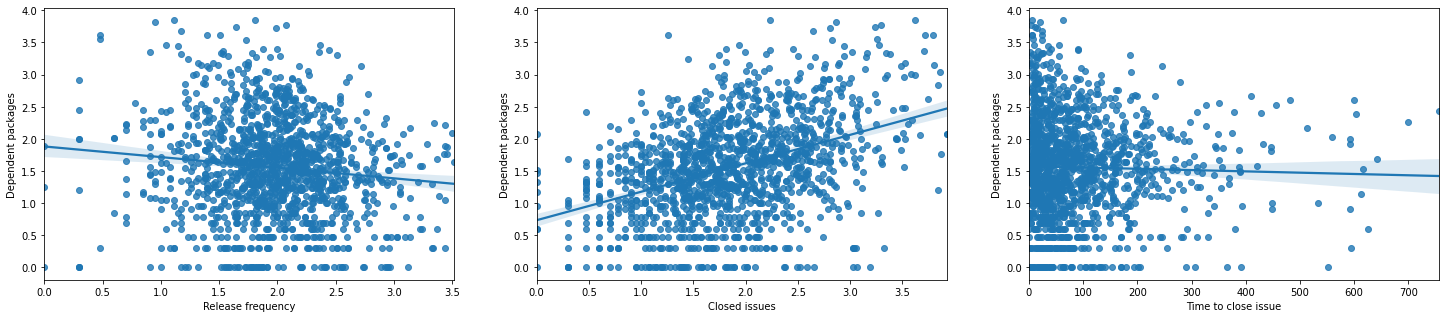

In [ ]:
# Scatter plot between each X and Y metrics
factors_count = len(X[0][0])
cols_per_row = 3
rows_per_target = math.ceil(factors_count/cols_per_row)


for chosen_y in range(0, targets_count):
    if chosen_y == 0: y_column = "PyPi downloads"
    elif chosen_y == 1: y_column = "Dependent repositories"
    else: y_column = "Dependent packages"
    #print("Plot Fit for Y = " + y_column)

    for plot_row in range(0, rows_per_target):
        fig, axs = plt.subplots(ncols=cols_per_row)
        fig.set_size_inches(25.0, 5.0)

        for col in range(0, cols_per_row):
            chosen_x = col + cols_per_row*plot_row
            #if chosen_x == 0:   x_column = "Last Commit"
            if chosen_x == 0: x_column = "Release frequency"
            elif chosen_x == 1: x_column = "Closed issues"
            else:               x_column = "Time to close issue"
            #print("Plot between " + x_column + " and " + y_column)
        
            axs[col].set(xlabel=x_column, ylabel=y_column)
            sns.regplot(X[chosen_y][:,chosen_x], Y[chosen_y], ax=axs[col])

In [ ]:
#X = np.array(X)
#X_scaled = preprocessing.scale(X)
#y = np.array(y)
#logreg = LogisticRegression(max_iter=1000)
#model = logreg.fit(X_scaled, y)

# Identify coefficients, pearson r and p-value
#print("PARAMETERS FOR 'pypi_downloads' VARIABLE")
#for i in range(0, 8):
#    coef = np.mean(logreg.coef_[:,i])
#    info = stats.pearsonr(X_scaled[:,i], y)
#    r = info[0]
#    pvalue = info[1]
#    column_name = ""
#    if i in [0, 1, 2, 3, 4, 5]: column_name = df.columns[i+3]
#    else: column_name = df.columns[i+4]
#    print(column_name + ": Coef = " + str(coef) + " - Pearson = " + str(r) + " - P Value = " + str(pvalue))

# Linear regression
#linreg = LinearRegression()
#model = linreg.fit(X, y)
#coefficients = linreg.coef_
#intercept = linreg.intercept_
#rank = linreg.rank_
#singular = linreg.singular_
#r2 = linreg.score(X, y)

#print("")
#print("Coefficients: \n", coefficients)
#print("Singular: \n", singular)
#print("Intercept: ", intercept)
#print("Rank: ", rank)
#print("R2: ", r2)